In [2]:
%matplotlib inline

import sys; sys.path.append("/data/miguel/practicum/DL-Medical-Physics")
from core import *
from train_functions import cos_annealing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pathlib2 import Path


PATH = Path('data/')
PATH1 = Path('/data/miguel/practicum/data')


# Metadata

In [3]:
# To balance validation and testing
def decode_labels(df_col):
    return np.array(list(map(np.array, df_col.str.split(' ')))).astype(int)


train_df = pd.read_csv(PATH1/'train_df.csv')
valid_df = pd.read_csv(PATH1/"val_df.csv")
test_df = pd.read_csv(PATH1/"test_df.csv")

print('Emphysema')
IDX = 10 # Emphysema
print(f'train: {decode_labels(train_df.Label)[:,IDX].sum()}')
print(f'validation: {decode_labels(valid_df.Label)[:,IDX].sum()}')
print(f'test: {decode_labels(test_df.Label)[:,IDX].sum()}')
print(f'Total: {decode_labels(train_df.Label)[:,IDX].sum()+decode_labels(valid_df.Label)[:,IDX].sum()+decode_labels(test_df.Label)[:,IDX].sum()}')

print('\nHernia')
IDX = 13 # Hernia
print(f'train: {decode_labels(train_df.Label)[:,IDX].sum()}')
print(f'validation: {decode_labels(valid_df.Label)[:,IDX].sum()}')
print(f'test: {decode_labels(test_df.Label)[:,IDX].sum()}')
print(f'Total: {decode_labels(train_df.Label)[:,IDX].sum()+decode_labels(valid_df.Label)[:,IDX].sum()+decode_labels(test_df.Label)[:,IDX].sum()}')

print('\nPneumonia')
IDX = 6 # Pneumonia
print(f'train: {decode_labels(train_df.Label)[:,IDX].sum()}')
print(f'validation: {decode_labels(valid_df.Label)[:,IDX].sum()}')
print(f'test: {decode_labels(test_df.Label)[:,IDX].sum()}')
print(f'Total: {decode_labels(train_df.Label)[:,IDX].sum()+decode_labels(valid_df.Label)[:,IDX].sum()+decode_labels(test_df.Label)[:,IDX].sum()}')

Emphysema
train: 1272
validation: 151
test: 1093
Total: 2516

Hernia
train: 121
validation: 20
test: 86
Total: 227

Pneumonia
train: 779
validation: 97
test: 555
Total: 1431


# Methods and Materials

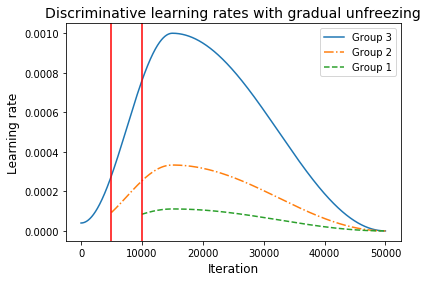

In [40]:
# Construct policy
N = 50_000 
lr = np.concatenate([cos_annealing(1e-3/25, 1e-3, int(N*.3)),
                    cos_annealing(1e-3, (1e-3/25)*1e-4, N-int(N*.3))]
                   )
# Ploting
x = range(N)

plt.plot(x, lr, label='Group 3')
plt.plot(x[int(.1*N):], lr[int(.1*N):]/3, '-.',  markersize=1, label='Group 2')
plt.plot(x[int(.2*N):], lr[int(.2*N):]/9, '--', label='Group 1')
plt.axvline(int(.1*N), color='red')
plt.axvline(int(.2*N), color='red')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Learning rate', fontsize=12)
plt.title('Discriminative learning rates with gradual unfreezing', fontsize=14)
plt.legend()
plt.show()

# All data

In [35]:
df = pd.read_csv(PATH/'all_data_overview/naive_DL_traditional_methods.csv')

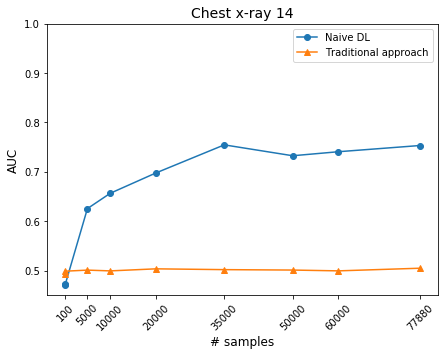

In [36]:
plt.figure(figsize=(7,5))
x = [50, 100, 5_000, 10_000, 20_000, 35_000, 50_000, 60_000, 77_880]
plt.plot(x, df[df['model']=='DenseNet121']['auc'], '-o', label='Naive DL')
plt.plot(x, df[df['model']=='ridge']['auc'], '-^', label='Traditional approach')
plt.xticks([100, 5_000, 10_000, 20_000, 35_000, 50_000, 60_000, 77_880] ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Chest x-ray 14', fontsize=14)
plt.show()

# Small data: Naive DL vs traditional methods

In [8]:
df = pd.read_csv(PATH/'small-data-naive-approach/naive_DL_vs_traditional_chestxray14.csv')
df2 = pd.read_csv(PATH/'small-data-naive-approach/naive_DL_vs_traditional_pneumonia.csv')

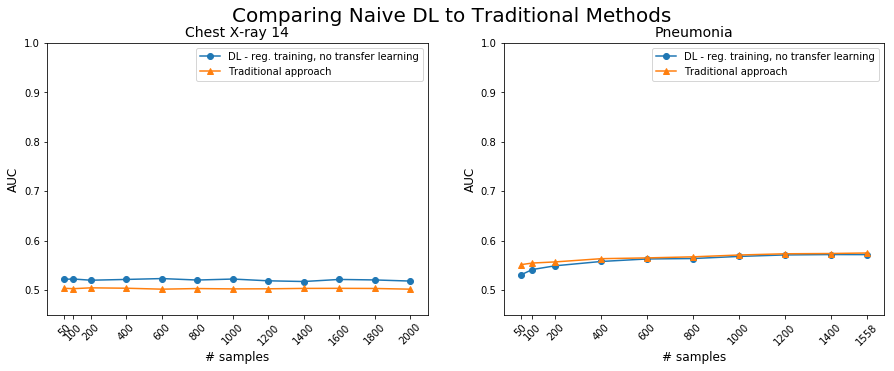

In [9]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparing Naive DL to Traditional Methods', fontsize=20)

plt.subplot(1,2,1)
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]
plt.plot(x, df[df['model']=='Densnet121']['mean'], '-o', label='DL - reg. training, no transfer learning')
plt.plot(x, df[df['model']=='Ridge']['mean'], '-^', label='Traditional approach')
plt.xticks(x ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Chest X-ray 14', fontsize=14)

plt.subplot(1,2,2)
x = [50,100,200,400,600,800,1000,1200,1400,1558]
plt.plot(x, df2[df2['model']=='Densnet121']['mean'], '-o', label='DL - reg. training, no transfer learning')
plt.plot(x, df2[df2['model']=='Ridge']['mean'], '-^', label='Traditional approach')
plt.xticks(x ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Pneumonia', fontsize=14)
plt.show()

# Training techniques

In [10]:
! ls ../training_methods/results/

chestxray14_one_cycle_training.json  hernia_one_cycle_training.json
chestxray14_regular_training.json    hernia_regular_training.json
emphysema_one_cycle_training.json    pneumonia_one_cycle_training.json
emphysema_regular_training.json      pneumonia_regular_training.json


In [20]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../training_methods/results/chestxray14_one_cycle_training.json') as jfile:
    chest14_one_cycle = json.load(jfile)
with open('../training_methods/results/chestxray14_regular_training.json') as jfile:
    chest14_regular = json.load(jfile)
    
with open('../training_methods/results/pneumonia_one_cycle_training.json') as jfile:
    pneumonia_one_cycle = json.load(jfile)
with open('../training_methods/results/pneumonia_regular_training.json') as jfile:
    pneumonia_regular = json.load(jfile)

disease = 'emphysema' 
with open(f'../training_methods/results/{disease}_one_cycle_training.json') as jfile:
    emphysema_one_cycle = json.load(jfile)
with open(f'../training_methods/results/{disease}_regular_training.json') as jfile:
    emphysema_regular = json.load(jfile)

disease = 'hernia'   
with open(f'../training_methods/results/{disease}_one_cycle_training.json') as jfile:
    hernia_one_cycle = json.load(jfile)
with open(f'../training_methods/results/{disease}_regular_training.json') as jfile:
    hernia_regular = json.load(jfile)

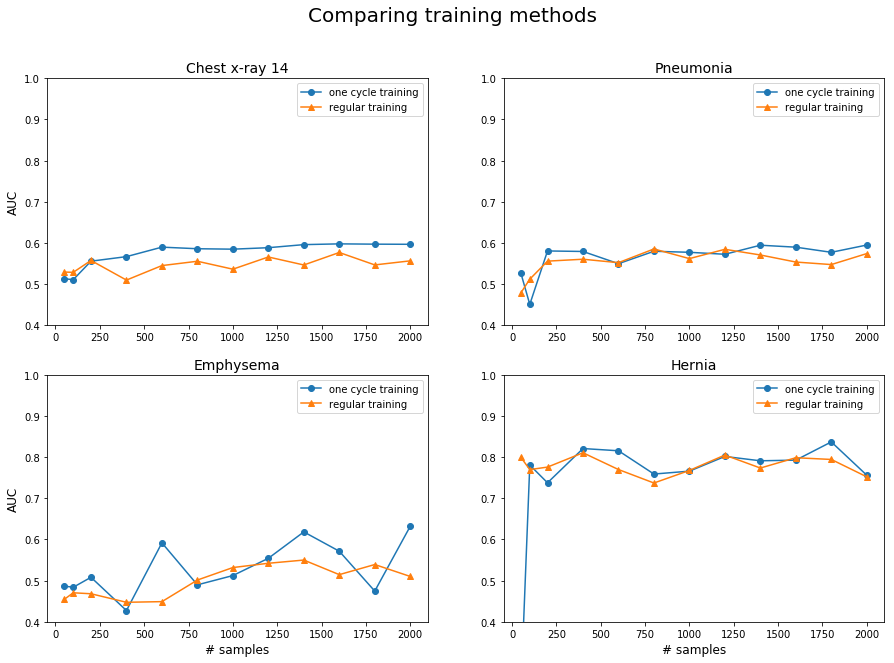

In [21]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparing training methods', fontsize=20)

plt.subplot(2,2,1)
plt.plot(x, chest14_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, chest14_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.40,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
# plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,2)
plt.plot(x, pneumonia_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, pneumonia_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.40,1)
plt.title('Pneumonia', fontsize=14)
# plt.xlabel('# samples', fontsize=12)


plt.subplot(2,2,3)
plt.plot(x, emphysema_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, emphysema_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.40,1)
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,4)
plt.plot(x, hernia_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, hernia_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.40,1)
plt.title('Hernia', fontsize=14)
plt.xlabel('# samples', fontsize=12)


plt.show()

# Transfer learning methods

In [28]:
! ls ../transfer_learning_methods/results/

chestxray14_feature_extractor.json  hernia_feature_extractor.json
chestxray14_fine_tune_all.json	    hernia_fine_tune_all.json
chestxray14_grad_unfr_diff_lr.json  hernia_grad_unfr_diff_lr.json
emphysema_feature_extractor.json    pneumonia_feature_extractor.json
emphysema_fine_tune_all.json	    pneumonia_fine_tune_all.json
emphysema_grad_unfr_diff_lr.json    pneumonia_grad_unfr_diff_lr.json


In [29]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../transfer_learning_methods/results/chestxray14_feature_extractor.json') as jfile:
    chest14_feature_extractor = json.load(jfile)
with open('../transfer_learning_methods/results/chestxray14_fine_tune_all.json') as jfile:
    chest14_fine_tune_all = json.load(jfile)
with open('../transfer_learning_methods/results/chestxray14_grad_unfr_diff_lr.json') as jfile:
    chest14_grad_unfr_diff_lr = json.load(jfile)
    
with open('../transfer_learning_methods/results/pneumonia_feature_extractor.json') as jfile:
    pneumonia_feature_extractor = json.load(jfile)
with open('../transfer_learning_methods/results/pneumonia_fine_tune_all.json') as jfile:
    pneumonia_fine_tune_all = json.load(jfile)
with open('../transfer_learning_methods/results/pneumonia_grad_unfr_diff_lr.json') as jfile:
    pneumonia_grad_unfr_diff_lr = json.load(jfile)

disease = 'emphysema' 
with open(f'../transfer_learning_methods/results/{disease}_feature_extractor.json') as jfile:
    emphysema_feature_extractor = json.load(jfile)
with open(f'../transfer_learning_methods/results/{disease}_fine_tune_all.json') as jfile:
    emphysema_fine_tune_all = json.load(jfile)
with open(f'../transfer_learning_methods/results/{disease}_grad_unfr_diff_lr.json') as jfile:
    emphysema_grad_unfr_diff_lr = json.load(jfile)

disease = 'hernia'
with open(f'../transfer_learning_methods/results/{disease}_feature_extractor.json') as jfile:
    hernia_feature_extractor = json.load(jfile)
with open(f'../transfer_learning_methods/results/{disease}_fine_tune_all.json') as jfile:
    hernia_fine_tune_all = json.load(jfile)
with open(f'../transfer_learning_methods/results/{disease}_grad_unfr_diff_lr.json') as jfile:
    hernia_grad_unfr_diff_lr = json.load(jfile)

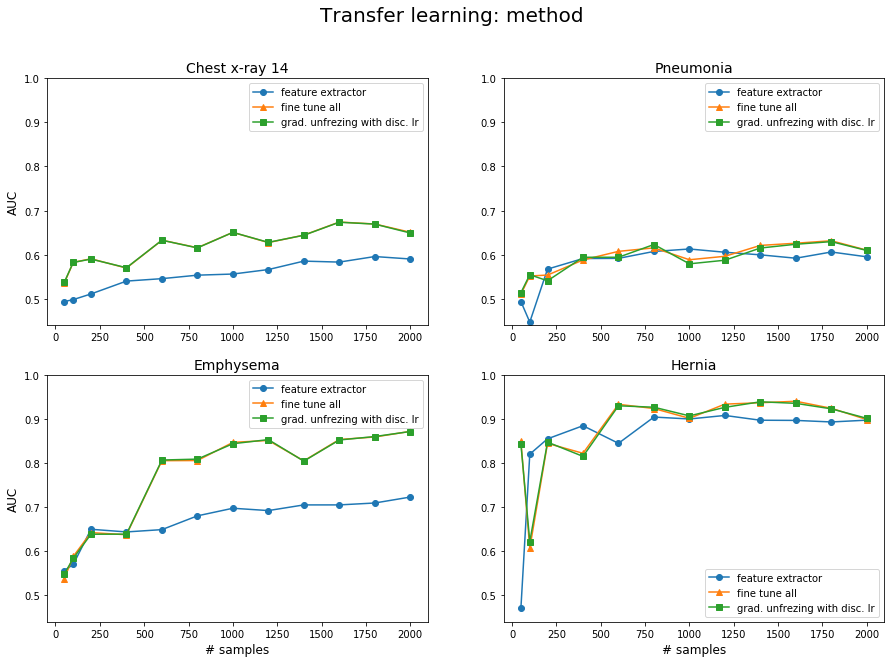

In [30]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Transfer learning: method', fontsize=20)

plt.subplot(2,2,1)
plt.plot(x, chest14_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, chest14_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, chest14_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with disc. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
# plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,2)
plt.plot(x, pneumonia_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, pneumonia_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, pneumonia_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with disc. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
# plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,3)
plt.plot(x, emphysema_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, emphysema_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, emphysema_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with disc. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,4)
plt.plot(x, hernia_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, hernia_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, hernia_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with disc. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Hernia', fontsize=14)
plt.xlabel('# samples', fontsize=12)

plt.show()

In [26]:
A = range(10)
list(A[::2])

[0, 2, 4, 6, 8]

# Transfer learning datasets

In [5]:
! ls ../transfer_learning_dataset/data_plots

13diseases.json		  MURA_14diseases.json
13diseases_small.json	  MURA_hernia.json
chexpert_14diseases.json  MURA.json
chexpert_hernia.json	  MURA_pneumonia.json
chexpert.json		  MURA_small.json
chexpert_pneumonia.json   no_pretrained_14diseases.json
imagenet_14diseases.json  no_pretrained_hernia.json
imagenet_hernia.json	  no_pretrained.json
imagenet.json		  no_pretrained_pneumonia.json
imagenet_pneumonia.json   no_pretrained_small.json
imagenet_small.json


In [6]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../transfer_learning_dataset/data_plots/chexpert_14diseases.json') as jfile:
    chestxray14_chexpert = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/MURA_14diseases.json') as jfile:
    chestxray14_MURA = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/imagenet_14diseases.json') as jfile:
    chestxray14_imagenet = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/no_pretrained_14diseases.json') as jfile:
    chestxray14_no_pretrained = json.load(jfile)

with open('../transfer_learning_dataset/data_plots/13diseases.json') as jfile:
    emphysema_13diseases = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/chexpert.json') as jfile:
    emphysema_chexpert = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/MURA.json') as jfile:
    emphysema_MURA = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/imagenet.json') as jfile:
    emphysema_imagenet = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/no_pretrained.json') as jfile:
    emphysema_no_pretrained = json.load(jfile)

DISEASE = 'Pneumonia'
with open(f'../transfer_learning_dataset/data_plots/chexpert_{DISEASE.lower()}.json') as jfile:
    pneumonia_chexpert = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/MURA_{DISEASE.lower()}.json') as jfile:
    pneumonia_MURA = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/imagenet_{DISEASE.lower()}.json') as jfile:
    pneumonia_imagenet = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/no_pretrained_{DISEASE.lower()}.json') as jfile:
    pneumonia_no_pretrained = json.load(jfile)

DISEASE = 'Hernia'
with open(f'../transfer_learning_dataset/data_plots/chexpert_{DISEASE.lower()}.json') as jfile:
    hernia_chexpert = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/MURA_{DISEASE.lower()}.json') as jfile:
    hernia_MURA = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/imagenet_{DISEASE.lower()}.json') as jfile:
    hernia_imagenet = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/no_pretrained_{DISEASE.lower()}.json') as jfile:
    hernia_no_pretrained = json.load(jfile)

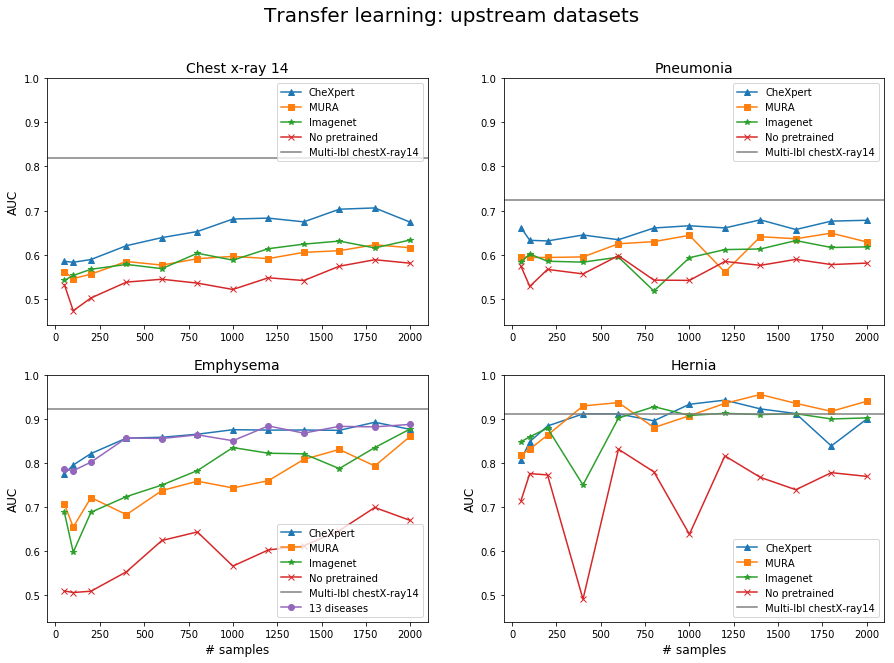

In [7]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Transfer learning: upstream datasets', fontsize=20)

plt.subplot(2,2,1)
plt.plot(x, chestxray14_chexpert['auc'], '-^', label='CheXpert')
plt.plot(x, chestxray14_MURA['auc'], '-s', label='MURA')
plt.plot(x, chestxray14_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, chestxray14_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.82, color='gray', label='Multi-lbl chestX-ray14')
plt.legend()
plt.ylim(.44,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
# plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,2)
plt.plot(x, pneumonia_chexpert['auc'], '-^', label='CheXpert')
plt.plot(x, pneumonia_MURA['auc'], '-s', label='MURA')
plt.plot(x, pneumonia_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, pneumonia_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.725, color='gray', label='Multi-lbl chestX-ray14')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
# plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,3)

plt.plot(x, emphysema_chexpert['auc'], '-^', label='CheXpert')
plt.plot(x, emphysema_MURA['auc'], '-s', label='MURA')
plt.plot(x, emphysema_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, emphysema_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.923, color='gray', label='Multi-lbl chestX-ray14')
plt.plot(x, emphysema_13diseases['auc'], '-o', label='13 diseases')
plt.ylim(.44,1)
plt.legend()
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,4)
plt.plot(x, hernia_chexpert['auc'], '-^', label='CheXpert')
plt.plot(x, hernia_MURA['auc'], '-s', label='MURA')
plt.plot(x, hernia_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, hernia_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.912, color='gray', label='Multi-lbl chestX-ray14')
plt.legend()
plt.ylim(.44,1)
plt.title('Hernia', fontsize=14)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)


plt.show()

Text(0.5, 0, '# samples')

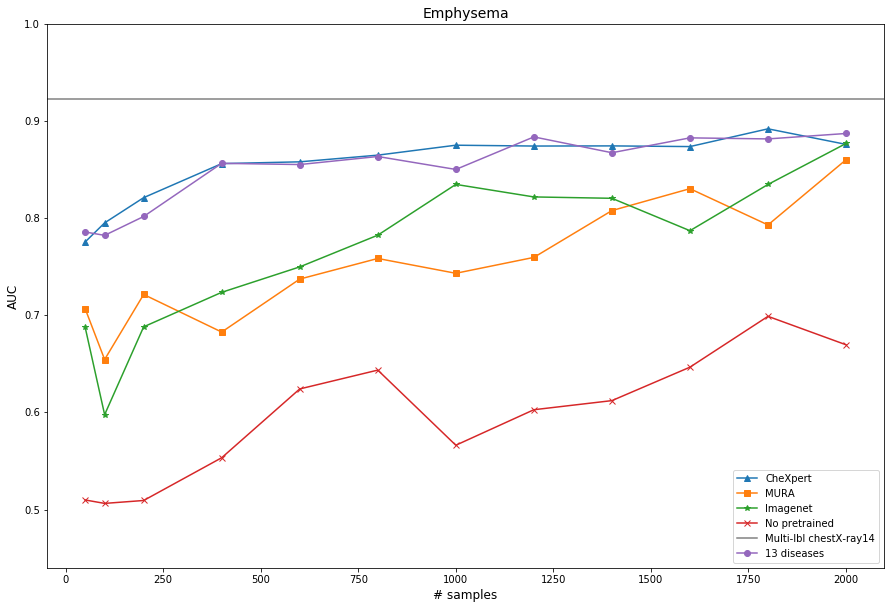

In [10]:
fig = plt.figure(figsize=(15,10))

plt.plot(x, emphysema_chexpert['auc'], '-^', label='CheXpert')
plt.plot(x, emphysema_MURA['auc'], '-s', label='MURA')
plt.plot(x, emphysema_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, emphysema_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.923, color='gray', label='Multi-lbl chestX-ray14')
plt.plot(x, emphysema_13diseases['auc'], '-o', label='13 diseases')
plt.ylim(.44,1)
plt.legend()
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

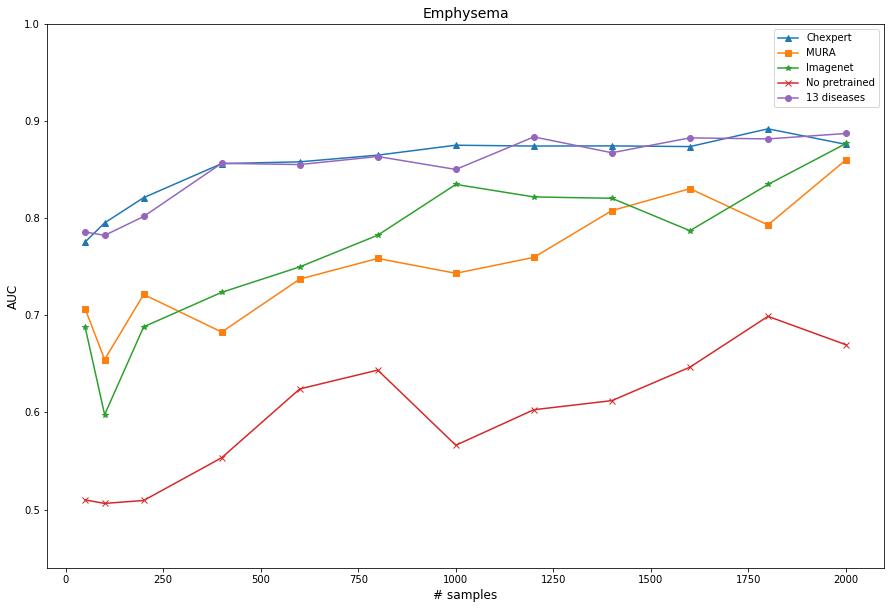

In [9]:
fig = plt.figure(figsize=(15,10))

plt.plot(x, emphysema_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, emphysema_MURA['auc'], '-s', label='MURA')
plt.plot(x, emphysema_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, emphysema_no_pretrained['auc'], '-x', label='No pretrained')
# plt.axhline(.923, color='red', label='Multi-lbl chestX-ray14')
plt.plot(x, emphysema_13diseases['auc'], '-o', label='13 diseases')
plt.ylim(.44,1)
plt.legend()
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.show()

# Results using the whole chest x ray and the proper training

In [47]:
{'Atelectasis': 0.7777638937179043,
 'Cardiomegaly': 0.8882716944725164,
 'Effusion': 0.8331421478637311,
 'Infiltration': 0.6839344107757633,
 'Mass': 0.8366145269199207,
 'Nodule': 0.7661666072832656,
 'Pneumonia': 0.7252368098300768,
 'Pneumothorax': 0.8640024568362074,
 'Consolidation': 0.752993899915239,
 'Edema': 0.8507316063175169,
 'Emphysema': 0.9233914222053733,
 'Fibrosis': 0.8275160380939851,
 'Pleural_Thickening': 0.7879706132917902,
 'Hernia': 0.9120928409287741}

{'Atelectasis': 0.7777638937179043,
 'Cardiomegaly': 0.8882716944725164,
 'Effusion': 0.8331421478637311,
 'Infiltration': 0.6839344107757633,
 'Mass': 0.8366145269199207,
 'Nodule': 0.7661666072832656,
 'Pneumonia': 0.7252368098300768,
 'Pneumothorax': 0.8640024568362074,
 'Consolidation': 0.752993899915239,
 'Edema': 0.8507316063175169,
 'Emphysema': 0.9233914222053733,
 'Fibrosis': 0.8275160380939851,
 'Pleural_Thickening': 0.7879706132917902,
 'Hernia': 0.9120928409287741}